In [1]:
import numpy as np
import pandas as pd 
import pylab as pl
from matplotlib import pyplot as plt #画图
from sklearn.cluster import KMeans 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import pandas_datareader as datareader
import matplotlib.pyplot as plt
import datetime
from mpl_finance import candlestick_ohlc
# from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

reading data from reading_scroll_features table and some data cleaning 

In [2]:
data = pd.read_csv('data/tbl_reading_style.csv')
data = data[data['relative_time'] < 2000]
data.head()

,user_id,reading_session,article_id,scroll_range,max_offset,min_offset,offset_difference,relative_time,reading_duration
0,111,00c29290-338e-42e9-8897-c475c799e1e5,30118783,7116,61,10,51,0,1
1,111,00c29290-338e-42e9-8897-c475c799e1e5,30118783,7116,0,0,0,1,1
2,111,2684b548-a936-46f8-90d7-3941bb9cd096,30345801,6830,203,5,198,0,1
3,111,2684b548-a936-46f8-90d7-3941bb9cd096,30345801,6830,336,0,-336,1,1
4,111,2684b548-a936-46f8-90d7-3941bb9cd096,30367210,5404,650,46,604,0,10


display how each user's reading relative time distributed. 

(7593,)
(7593,)
(7593, 2)


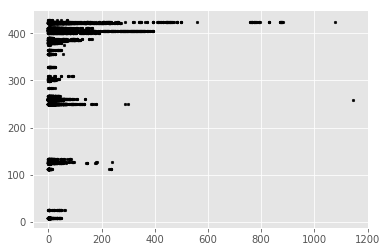

In [3]:
f1 = data['relative_time'].values
print(f1.shape)
f2= data['user_id'].values
print(f2.shape)
x = np.array(list(zip(f1,f2)))
print(x.shape)
plt.scatter(f1,f2, c='black', s=7)
#filter data 1.filtered() 2.sql 



In [4]:
# for index, row in data.iterrows():
#     if row['offset_difference'] < 0:
#         temp = row['max_offset']
#         row['max_offset'] = row['min_offset']
#        row['min_offset'] = temp
#         print(row['max_offset'],row['min_offset'],row['offset_difference'])
#         np.append([row['max_offset'],row['min_offset'],row['offset_difference']],a)
#     if row['offset_difference'] > 0:
#         np.append([row['max_offset'],row['min_offset'],row['offset_difference']],a)
#         print(row['max_offset'],row['min_offset'],row['offset_difference'])



display reading style by users

In [5]:
pd.options.display.max_rows = 1000
filtered_data =  data[(data['user_id'] == 133)]
filtered_data.head()




,user_id,reading_session,article_id,scroll_range,max_offset,min_offset,offset_difference,relative_time,reading_duration
264,133,994c6021-ae57-4531-ace8-4c2ee91bf920,36524212,12330,27,27,0,0,13
265,133,994c6021-ae57-4531-ace8-4c2ee91bf920,36524212,12330,1122,64,1058,1,13
266,133,994c6021-ae57-4531-ace8-4c2ee91bf920,36524212,12330,1130,1124,6,2,13
267,133,994c6021-ae57-4531-ace8-4c2ee91bf920,36524212,12330,1086,403,-683,3,13
268,133,994c6021-ae57-4531-ace8-4c2ee91bf920,36524212,12330,402,0,-402,4,13


In [6]:
filtered_data1 = filtered_data[(filtered_data['article_id'] ==36524212 )]
filtered_data2 = filtered_data[(filtered_data['article_id'] ==36579430 )]
filtered_data3 = filtered_data[(filtered_data['article_id'] ==36615028 )]
filtered_data4 = filtered_data[(filtered_data['article_id'] ==36608269 )]
filtered_data5 = filtered_data[(filtered_data['article_id'] ==36574299 )]
filtered_data6 = filtered_data[(filtered_data['article_id'] ==36662684 )]
filtered_data7 = filtered_data[(filtered_data['article_id'] ==36638178 )]
filtered_data8 = filtered_data[(filtered_data['article_id'] ==36661402 )]

# + --------------- +
# | article_id      |
# + --------------- +
# | 36524212        |
# | 36579430        |
# | 36615028        |
# | 36608269        |
# | 36574299        |
# | 36662684        |
# | 36638178        |
# | 36661402        |
# + --------------- +

([<matplotlib.lines.Line2D at 0x1a2287f630>,
  <matplotlib.patches.Rectangle at 0x1a228b20f0>])

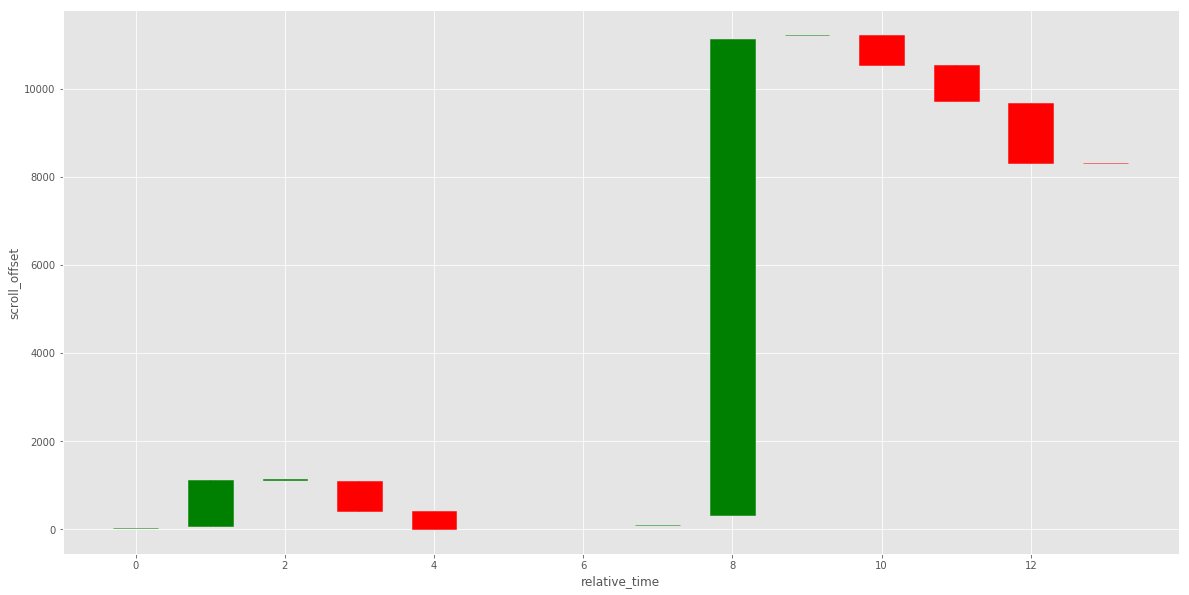

In [7]:
#for i in filtered_data: 
  #  if filtered_data['offset_difference'] > 0:
  ##      ohlc= filtered_data[['relative_time', 'max_offset', 'max_offset', 'min_offset','min_offset']].copy()
 #   else:
#        ohlc= filtered_data[['relative_time',  'min_offset','min_offset','max_offset', 'max_offset']].copy()
        
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data1.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]
f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')




([<matplotlib.lines.Line2D at 0x1a22d19cf8>,
  <matplotlib.patches.Rectangle at 0x1a22d65cf8>])

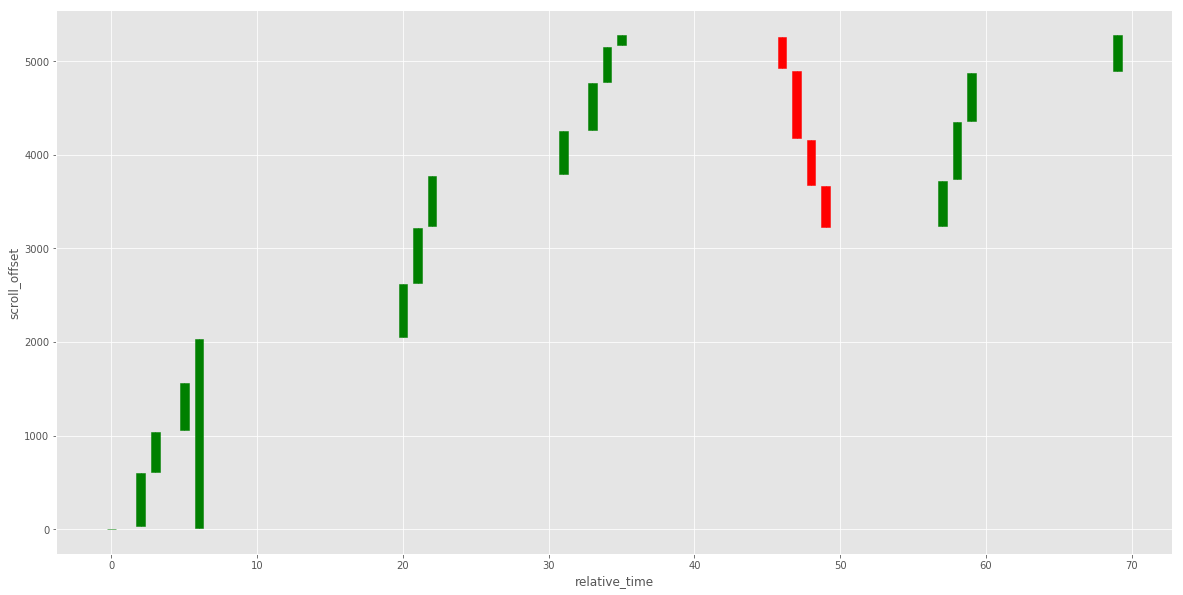

In [8]:
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data2.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a2223bcc0>,
  <matplotlib.patches.Rectangle at 0x1a22dbdf60>])

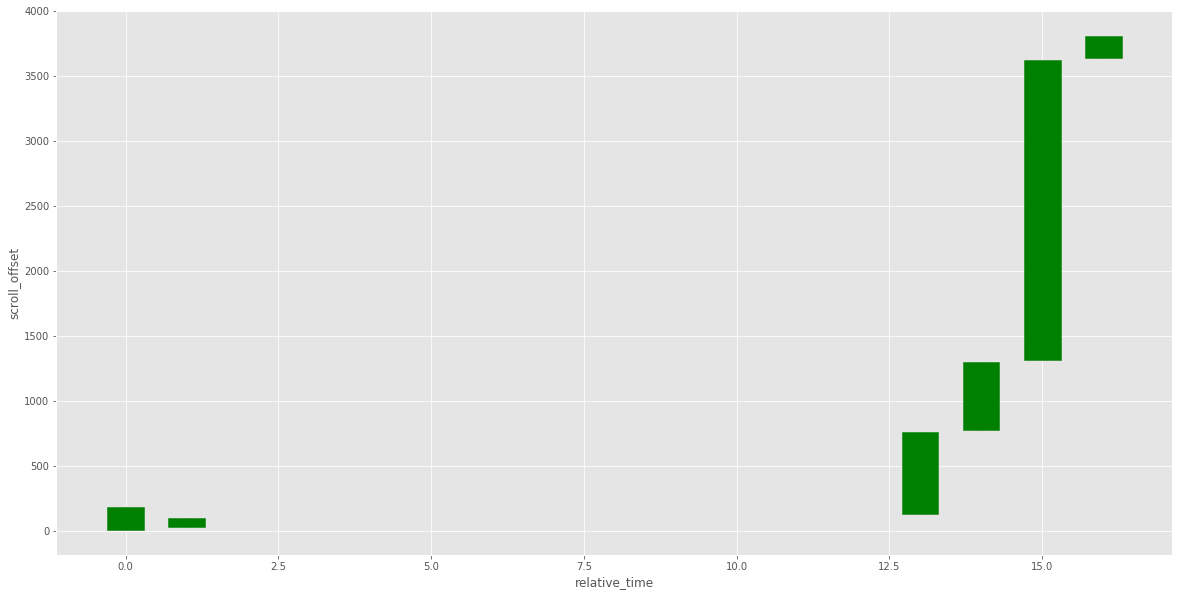

In [9]:
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data3.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]
f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a22e41eb8>,
  <matplotlib.patches.Rectangle at 0x1a22e722e8>])

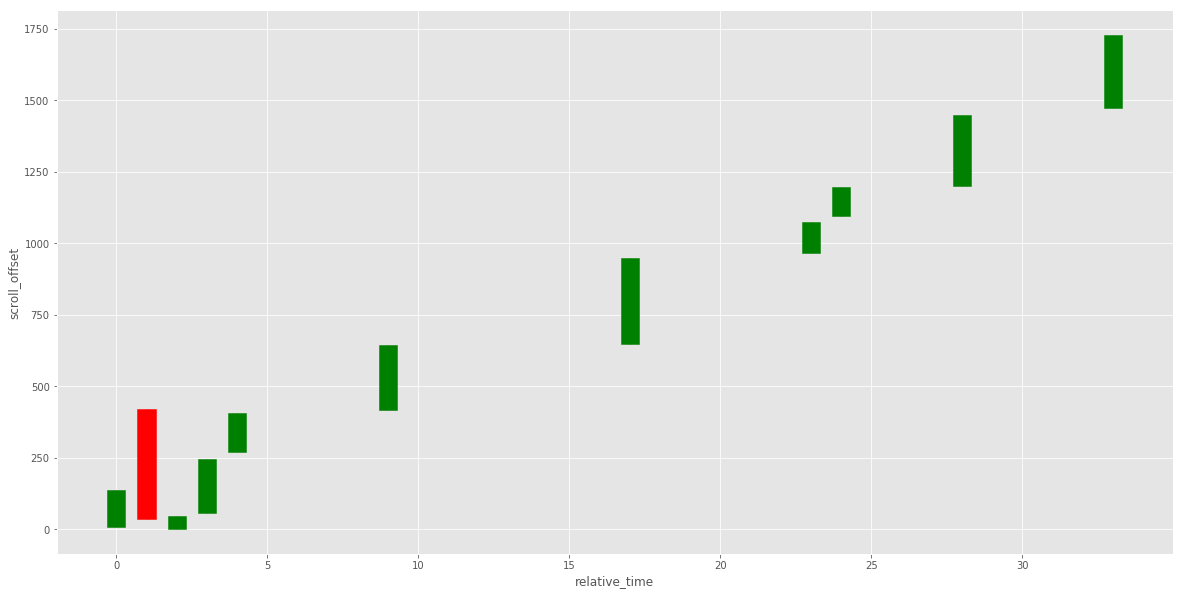

In [10]:
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data4.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]
f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a22ee2390>,
  <matplotlib.patches.Rectangle at 0x1a231ce240>])

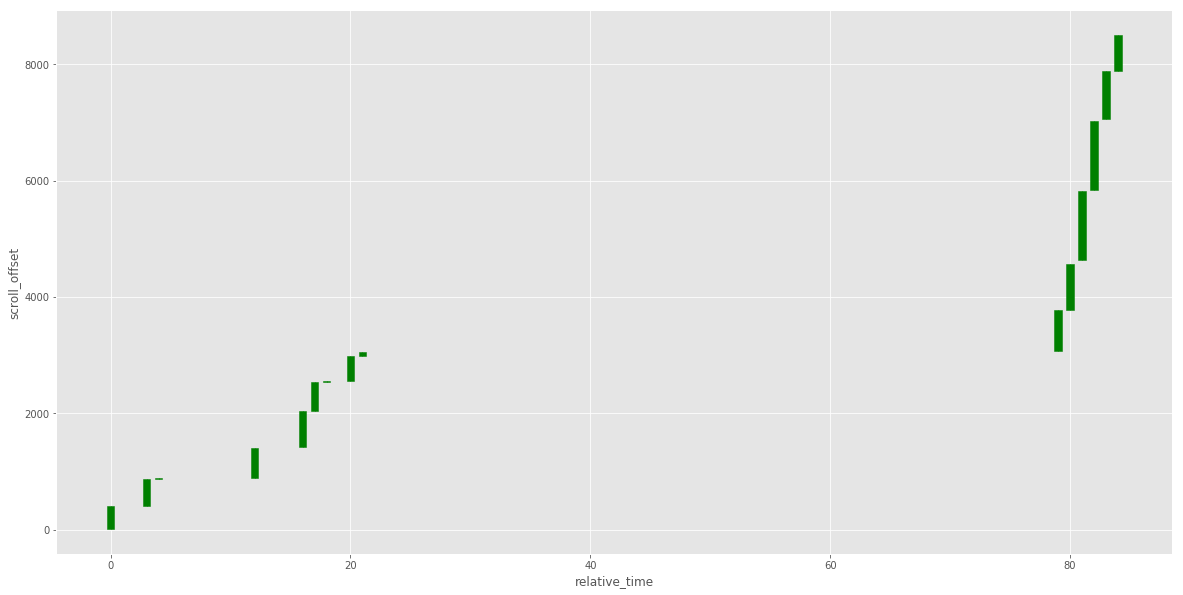

In [12]:
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data6.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]
f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a234de7b8>,
  <matplotlib.patches.Rectangle at 0x1a23504518>])

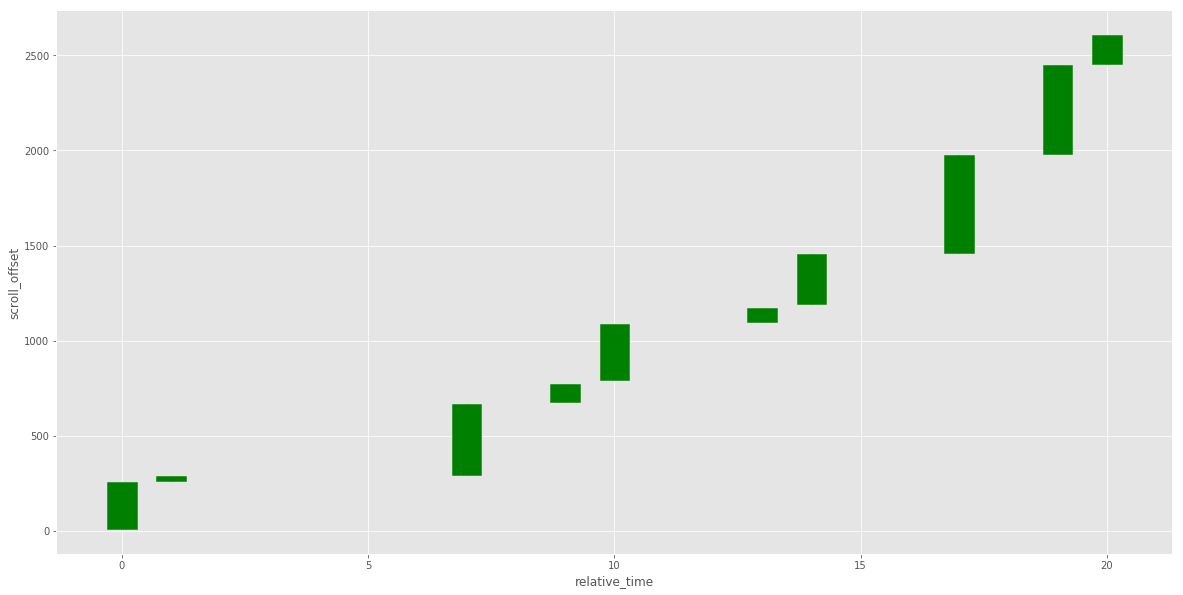

In [13]:
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data7.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]

f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')





([<matplotlib.lines.Line2D at 0x1a2459bb00>,
  <matplotlib.patches.Rectangle at 0x1a24872860>])

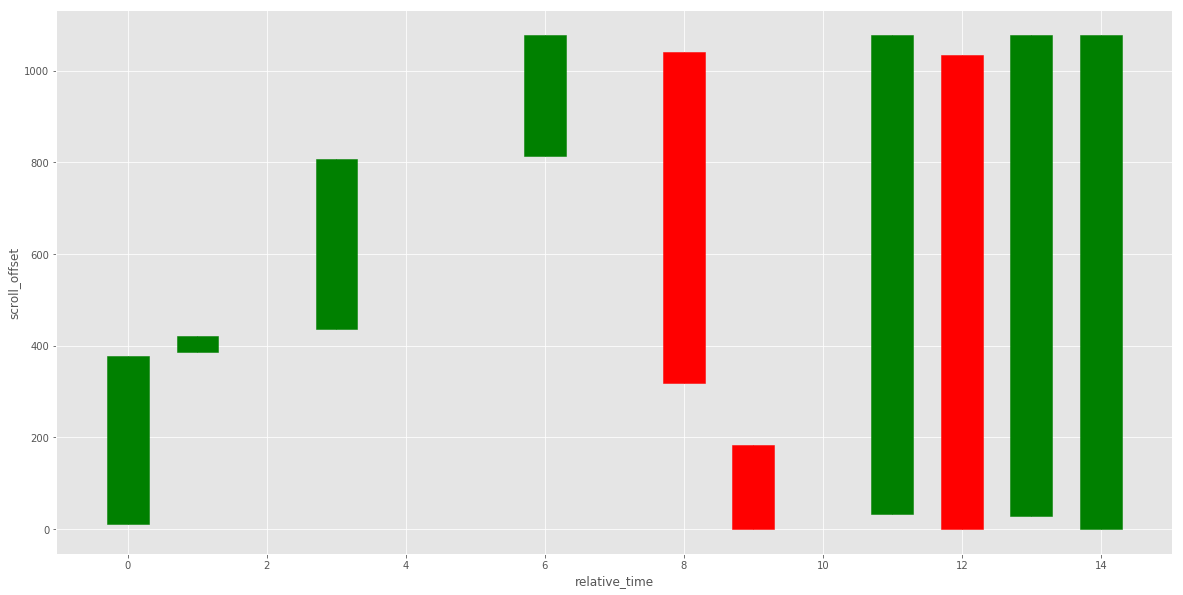

In [43]:
ohlc =pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])
for index, row in filtered_data8.iterrows():
    if int(row['offset_difference'])>0:
        ohlc.loc[index]=[row['relative_time'], row['min_offset'], row['max_offset'], row['min_offset'],row['max_offset']]
    else :
        ohlc.loc[index]=[row['relative_time'], row['max_offset'], row['max_offset'], row['min_offset'],row['min_offset']]
f1, ax = plt.subplots(figsize = (20,10))
ax.set_xlabel('relative_time')
ax.set_ylabel('scroll_offset')
candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')



